In [28]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

<div class="alert-warning">
    
## Instructions  
rubric={points}

You will earn points for following these instructions and successfully submitting your work on Gradescope.  

### Before you start  

- Please **read carefully
[Use of Generative AI policy](https://ubc-cs.github.io/cpsc330-2025W1/syllabus.html#use-of-generative-ai-in-the-course)** before starting the homework assignment. 
  
- Review the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2025W1/docs/homework_instructions.html) for detailed guidance on completing and submitting assignments. 

### Group work instructions

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2.
  
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   
### Before submitting  

- **Run all cells** (▶▶ button) to ensure the notebook executes cleanly from top to bottom.

  - Execution counts must start at **1** and be sequential.
    
  - Notebooks with missing outputs or errors may lose marks.

- **Do not upload or push data files** used in this lab to GitHub or Gradescope. (A `.gitignore` is provided to prevent this.)  


### Submitting on Gradescope  

- Upload **only** your `.ipynb` file (with outputs shown) and any required output files. Do **not** submit extra files.
  
- If needed, refer to the [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/).  
- If your notebook is too large to render, also upload a **Web PDF** or **HTML** version.  
  - You can create one using **File $\rightarrow$ Save and Export Notebook As**.  
  - If you get an error when creating a PDF, try running the following commands in your lab directory:  

    ```bash
    conda install -c conda-forge nbconvert-playwright
    jupyter nbconvert --to webpdf lab1.ipynb
    ```  

  - Ensure all outputs are visible in your PDF or HTML file; TAs cannot grade your work if outputs are missing.

</div>


_Note: Unlike previous assignments, this one is open-ended and project-style. Treat it as an opportunity to explore, experiment, and learn._

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [29]:
# Tools and visuals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns

# Classifiers
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Preprocessing
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer

# Optimization
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, auc, precision_recall_curve, confusion_matrix
# from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve


Note: you may need to restart the kernel to use updated packages.


<!-- END QUESTION -->

## Introduction

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (10-14 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


<div class="alert alert-info">
    
**Your tasks:**

1. Review the available datasets and choose the one you find most interesting. It may help to read through the dataset documentation on Kaggle before deciding.
2. Once you've selected a dataset, take time to understand the problem it represents and the meaning of each feature. Use the Kaggle documentation to guide you.
3. Download the dataset and load it into a pandas DataFrame.
4. Write a few sentences summarizing your initial thoughts about the problem and the dataset.
   
</div>

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

I chose Option 1 — predicting whether a credit card client will default. At first glance, this problem seems straightforward and well-suited for the classification models we’ve been studying, such as logistic regression and decision trees. However, after reviewing the Kaggle documentation, it becomes clear that the dataset contains several ambiguous and erroneous entries that require careful preprocessing. This makes it an excellent opportunity to apply feature exploration, preprocessing, and engineering techniques learned in class. Furthermore, the real-world relevance of this problem emphasizes the importance of feature selection and interpretability, providing an opportunity to apply the feature importance and selection strategies explored in class.

In [30]:
default_df = pd.read_csv("data/default.csv")
print(default_df.shape)
default_df.head()

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.

</div>

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [31]:
train_df, test_df = train_test_split(default_df, test_size=0.3, random_state=123)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA
<hr>
rubric={points:10}

<div class="alert alert-info">

**Your tasks:**

1. **Perform exploratory data analysis (EDA)**: Conduct an initial exploration of the training set to better understand its characteristics.

2. **Summarize and visualize the data**: Include at least **two summary statistics** and **two visualizations** that you find informative. For each, write **one sentence** explaining what insight it provides.

3. **Record your observations**: Summarize your **initial observations** about the dataset based on your EDA.

4. **Select evaluation metrics**: Choose one or more **appropriate metrics** for assessing model performance and briefly justify your choice.

</div>

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

In [32]:
train_df['EDUCATION'].value_counts().sort_index()

EDUCATION
0      10
1    7433
2    9815
3    3416
4      81
5     210
6      35
Name: count, dtype: int64

In [33]:
train_df['MARRIAGE'].value_counts().sort_index()

MARRIAGE
0       34
1     9527
2    11210
3      229
Name: count, dtype: int64

The EDUCATION and MARRIAGE columns contain values that are inconsistent with the Kaggle documentation. According to the dataset description, MARRIAGE should include only the categories 1, 2, and 3, and EDUCATION should range from 1 to 6; however, both features also include an undocumented category labeled 0. In addition, EDUCATION contains two “unknown” categories, 5 and 6.

Several approaches could be taken to address the issues with EDUCATION: (1) dropping categories 0, 5, and 6 entirely; (2) dropping 0 and merging 5 and 6 into a single “unknown” category; or (3) merging 5 and 6 into 4 (“other”). Dropping all three is undesirable, as categories 5 and 6 together contain 245 examples, while keeping 0 is not justified, since it represents only 10 cases and is undocumented. Merging 0 with 5 and 6 is also inappropriate, as there is no evidence that 0 carries the same semantic meaning as the “unknown” categories.

Merging 5 and 6 into 4 (“other”) could obscure potentially meaningful distinctions between “other” and truly “unknown” education levels. Therefore, the most reasonable approach is to drop category 0 and merge 5 and 6 into a single “unknown” category (5) although we risk losing subtle differences between the 5 and 6 categories, if any exist. Since the dataset documentation provides no further clarification, I will proceed by merging them into a single category (5) and assume that they do not contain any useful information for classification.

For MARRIAGE, category 0 will be dropped entirely, as it contains only 34 examples and cannot be meaningfully merged with category 4 (“other”), which likely represents a distinct and more clearly defined group (e.g., divorced individuals). In contrast, category 0 appears to represent an “unknown” marital status that could include people from any marriage category, making it safer to remove to prevent noise and potential overfitting.

In [34]:
train_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14962.348238,167880.651429,1.600762,1.852143,1.554000,35.500810,-0.015429,-0.137095,-0.171619,-0.225238,...,43486.610905,40428.518333,38767.202667,5673.585143,5.895027e+03,5311.432286,4774.021381,4751.850095,5237.762190,0.223238
std,8650.734050,130202.682167,0.489753,0.792961,0.521675,9.212644,1.120465,1.194506,1.196123,1.168556,...,64843.303993,61187.200817,59587.689549,17033.241454,2.180143e+04,18377.997079,15434.136142,15228.193125,18116.846563,0.416427
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-50616.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7498.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2293.750000,1739.500000,1215.750000,1000.000000,8.200000e+02,390.000000,266.000000,234.000000,110.750000,0.000000
50%,14960.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19102.500000,18083.000000,16854.500000,2100.000000,2.007000e+03,1809.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22458.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54763.250000,50491.000000,49253.750000,5007.250000,5.000000e+03,4628.500000,4021.250000,4016.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


Similarly, PAY columns are reported to contain values in the range {-1, 1–9}; however, the dataset also includes the additional categories -2 and 0. Further research suggests that these values all represent on-time payments, differing only in payment timing or billing method. Since Kaggle provides no official clarification, it is more reliable to consolidate -2, -1, and 0 into a single category (0) representing on-time payments. This simplification is unlikely to harm predictive performance and may even reduce overfitting by removing arbitrary distinctions between similar cases. Moreover, because these features will be treated as ordinal, collapsing these categories preserves a clear and interpretable ordering—where 0 indicates on-time payments and higher values reflect increasing payment delays. It is also conceptually inconsistent to rank -2, -1, and 0 separately, as all indicate timely payment behavior. Therefore, combining them into a single class (0) both simplifies the representation and maintains the intended ordinal structure of the data.

All other features are consistent with the Kaggle documentation. Nevertheless, I will drop the ID and SEX columns: ID provides no useful information for prediction, and including SEX could introduce bias and raise ethical concerns during deployment. Additionally, the large variance observed in the AGE, BILL_AMT, and PAY_AMT features indicates the need for feature scaling to ensure that models relying on distance or magnitude are not unduly influenced by these variables.

In [35]:
train_df.drop(columns=['ID'], inplace=True)
train_df.drop(columns=['SEX'], inplace=True)
test_df.drop(columns=['ID'], inplace=True)
test_df.drop(columns=['SEX'], inplace=True)

In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 16395 to 19966
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   21000 non-null  float64
 1   EDUCATION                   21000 non-null  int64  
 2   MARRIAGE                    21000 non-null  int64  
 3   AGE                         21000 non-null  int64  
 4   PAY_0                       21000 non-null  int64  
 5   PAY_2                       21000 non-null  int64  
 6   PAY_3                       21000 non-null  int64  
 7   PAY_4                       21000 non-null  int64  
 8   PAY_5                       21000 non-null  int64  
 9   PAY_6                       21000 non-null  int64  
 10  BILL_AMT1                   21000 non-null  float64
 11  BILL_AMT2                   21000 non-null  float64
 12  BILL_AMT3                   21000 non-null  float64
 13  BILL_AMT4                   2100

The dataset is composed of categorical, numerical, and ordinal features. There are no missing entries. 

In [37]:
train_df["default.payment.next.month"].value_counts()

default.payment.next.month
0    16312
1     4688
Name: count, dtype: int64

The dataset is imbalanced, with a class distribution of approximately 0.22:0.78. This imbalance indicates the need for class weighting or the use of alternative performance metrics during training, since a dummy classifier predicting the majority class could already achieve about 78% accuracy. Therefore, I will use Average Precision as the performance metric, as it captures how effectively the model identifies defaulters in an imbalanced setting. In this context, accurately detecting defaulters is crucial to reducing financial risk, while also minimizing false negatives to ensure fair and equal treatment of clients. Unlike ROC–AUC, which can appear artificially high when the majority class dominates, AP directly evaluates the trade-off between precision and recall. Although metrics such as recall or F1-score could also be appropriate, AP provides a more informative summary of model performance under imbalance by reflecting how well the model balances both types of errors and evaluates performance across all possible classification thresholds.

In [38]:
pay_status_cols = ['PAY_0', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
bill_amt_cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
pay_amt_cols = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
continuous_cols = bill_amt_cols + pay_amt_cols + ['LIMIT_BAL', 'AGE']
discrete_cols = pay_status_cols + ["EDUCATION", "MARRIAGE"]

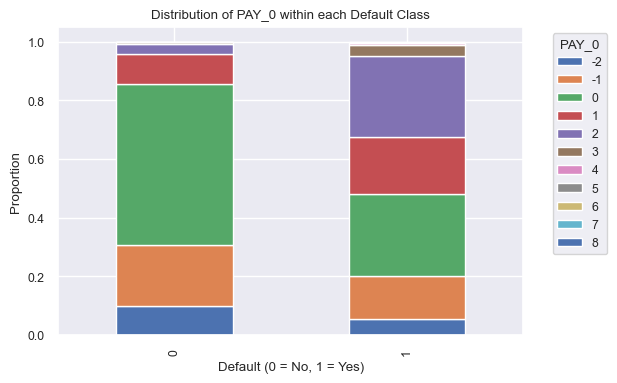

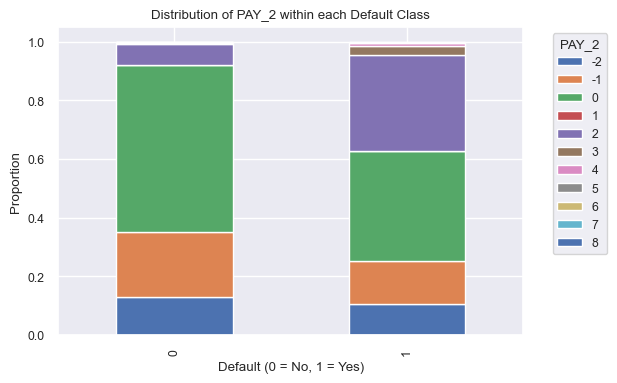

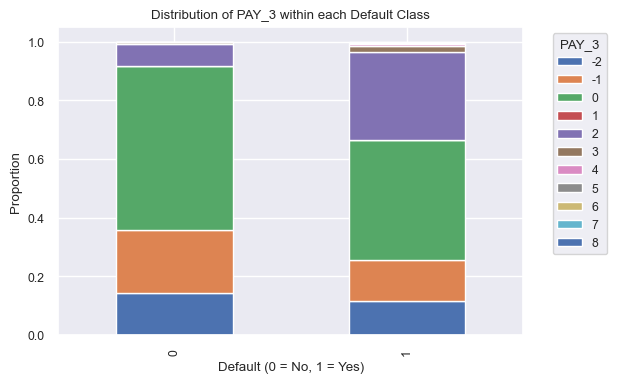

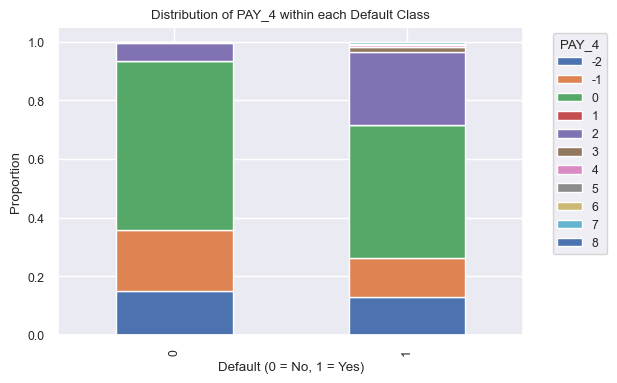

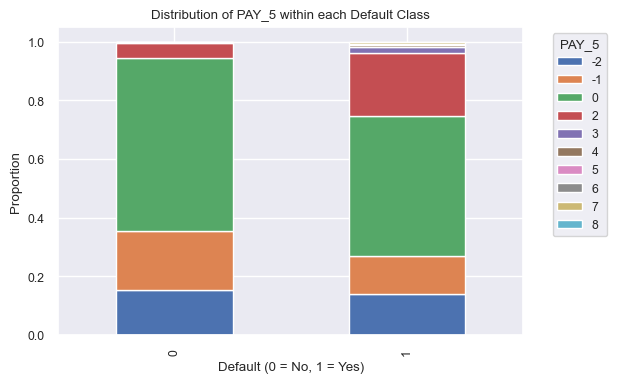

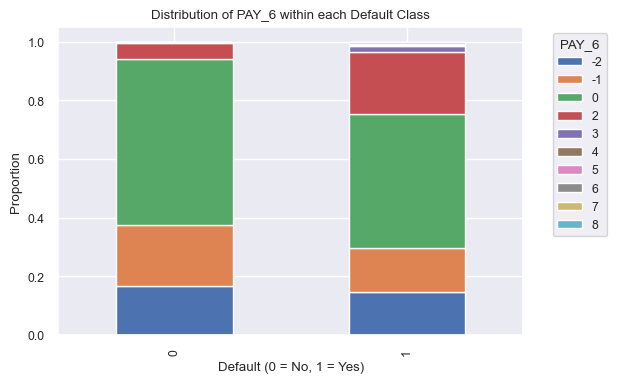

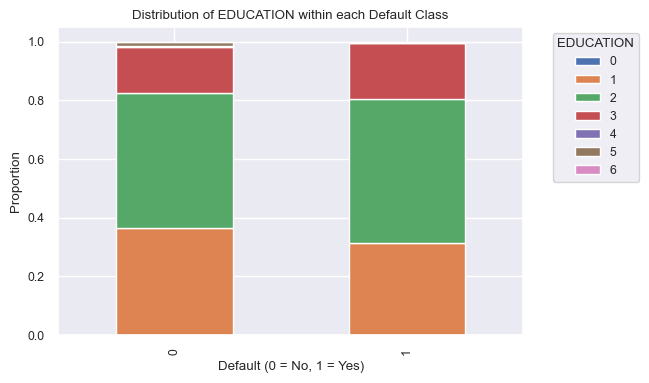

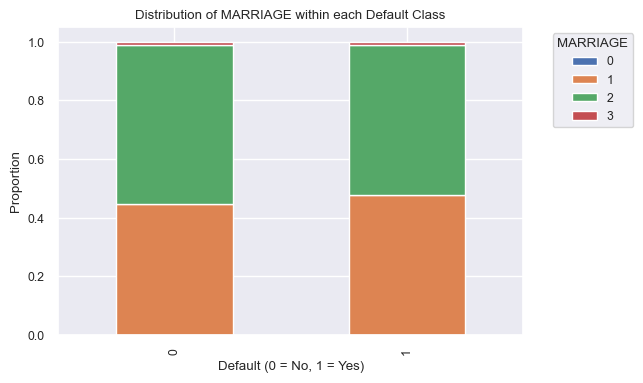

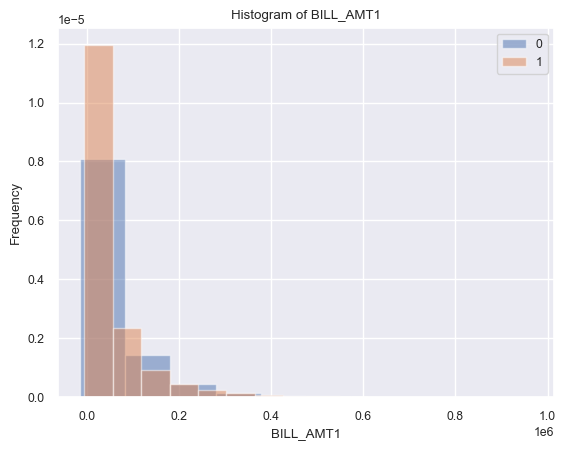

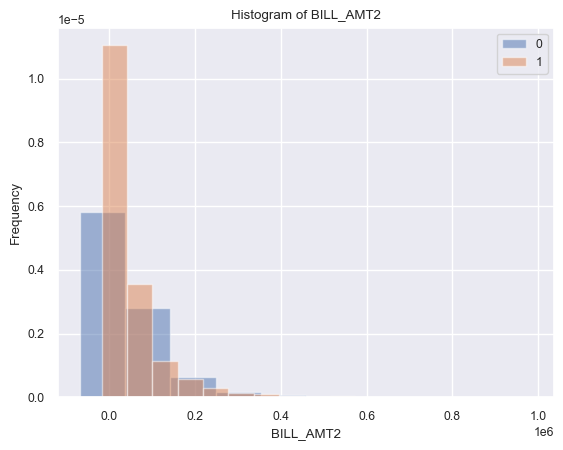

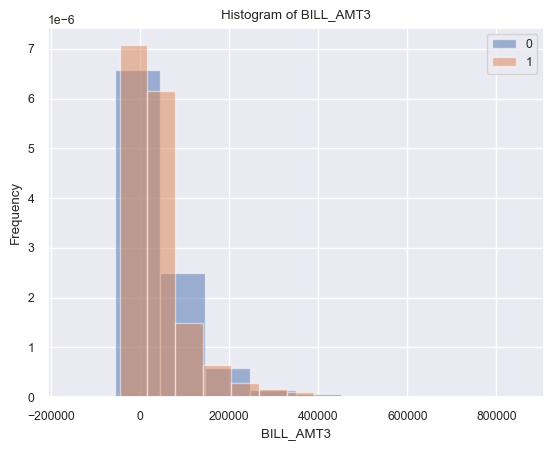

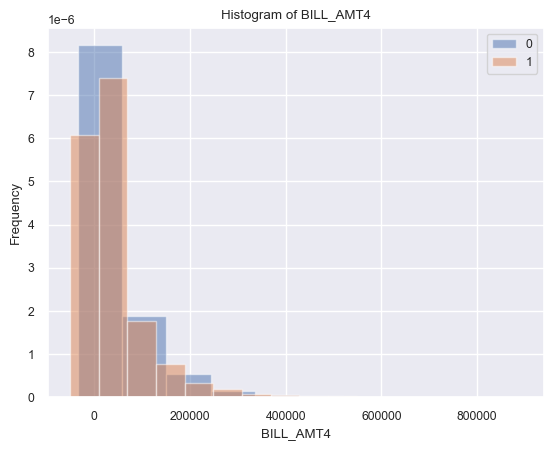

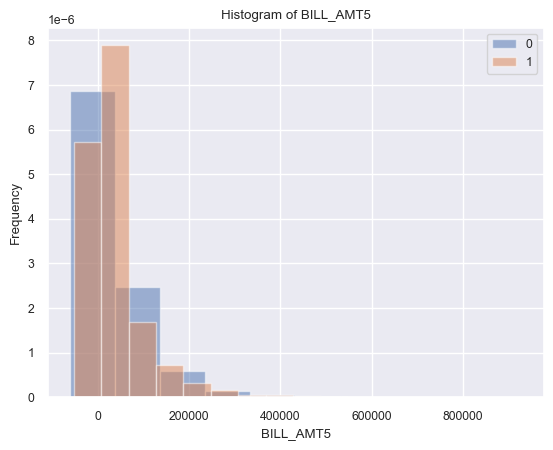

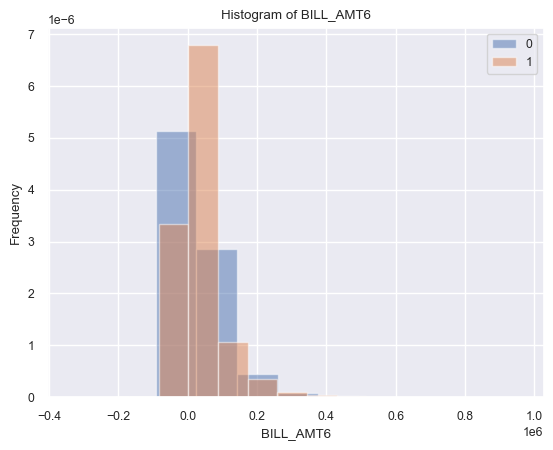

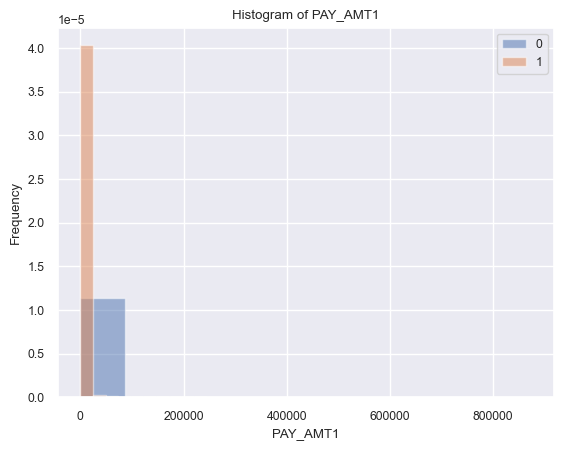

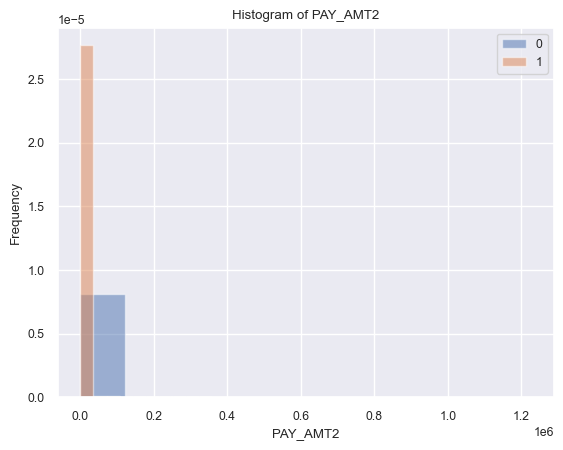

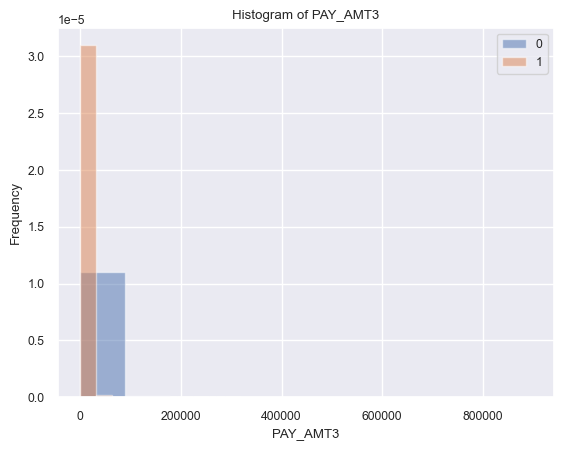

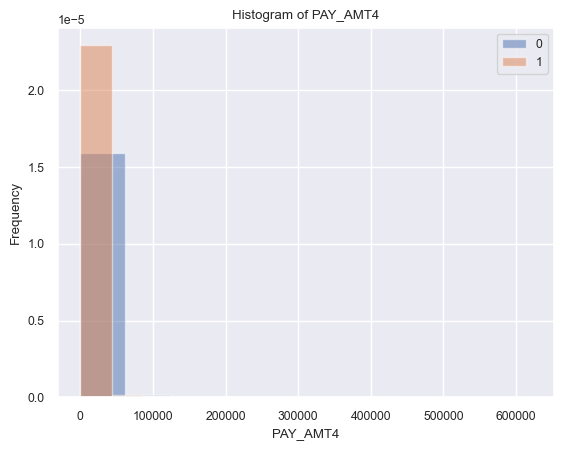

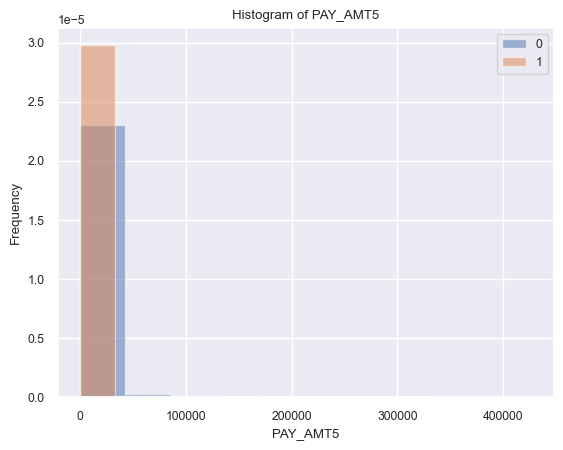

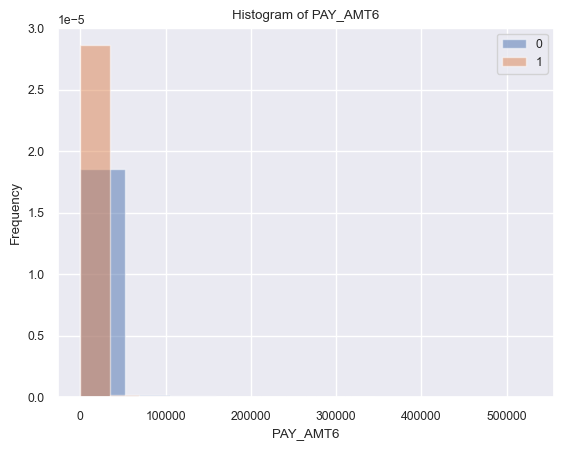

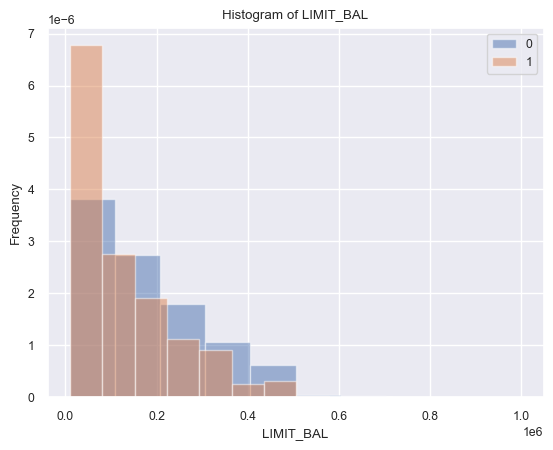

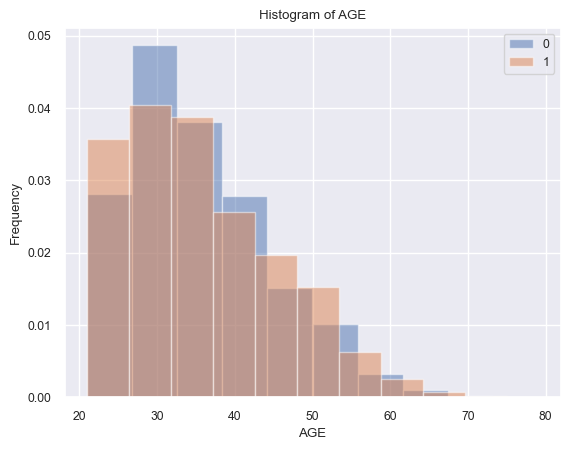

In [46]:
def plot_histogram_continuous(col):
    train_df.groupby("default.payment.next.month")[col].plot.hist(bins=10, alpha=0.5, density=True, legend=True, title = "Histogram of " + col);
    plt.xlabel(col);
    plt.show()
    # Here we normalize with density=True to get a better comparison of their distributions

def plot_discrete_feature(col):
    cross_tab = pd.crosstab(train_df["default.payment.next.month"], train_df[col], normalize='index')
    cross_tab.plot(
        kind='bar',
        stacked=True,
        figsize=(6,4)
    )
    plt.title(f"Distribution of {col} within each Default Class")
    plt.xlabel("Default (0 = No, 1 = Yes)")
    plt.ylabel("Proportion")
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

for col in discrete_cols:
    plot_discrete_feature(col)

for col in continuous_cols:
    plot_histogram_continuous(col)



LIMIT_BAL: both graphs are right-skewed. The default class has a higher density at the lower credit limit range compared to the non-defaulters which is expected since people with higher credit limits are more trustworthy and less likely to default.


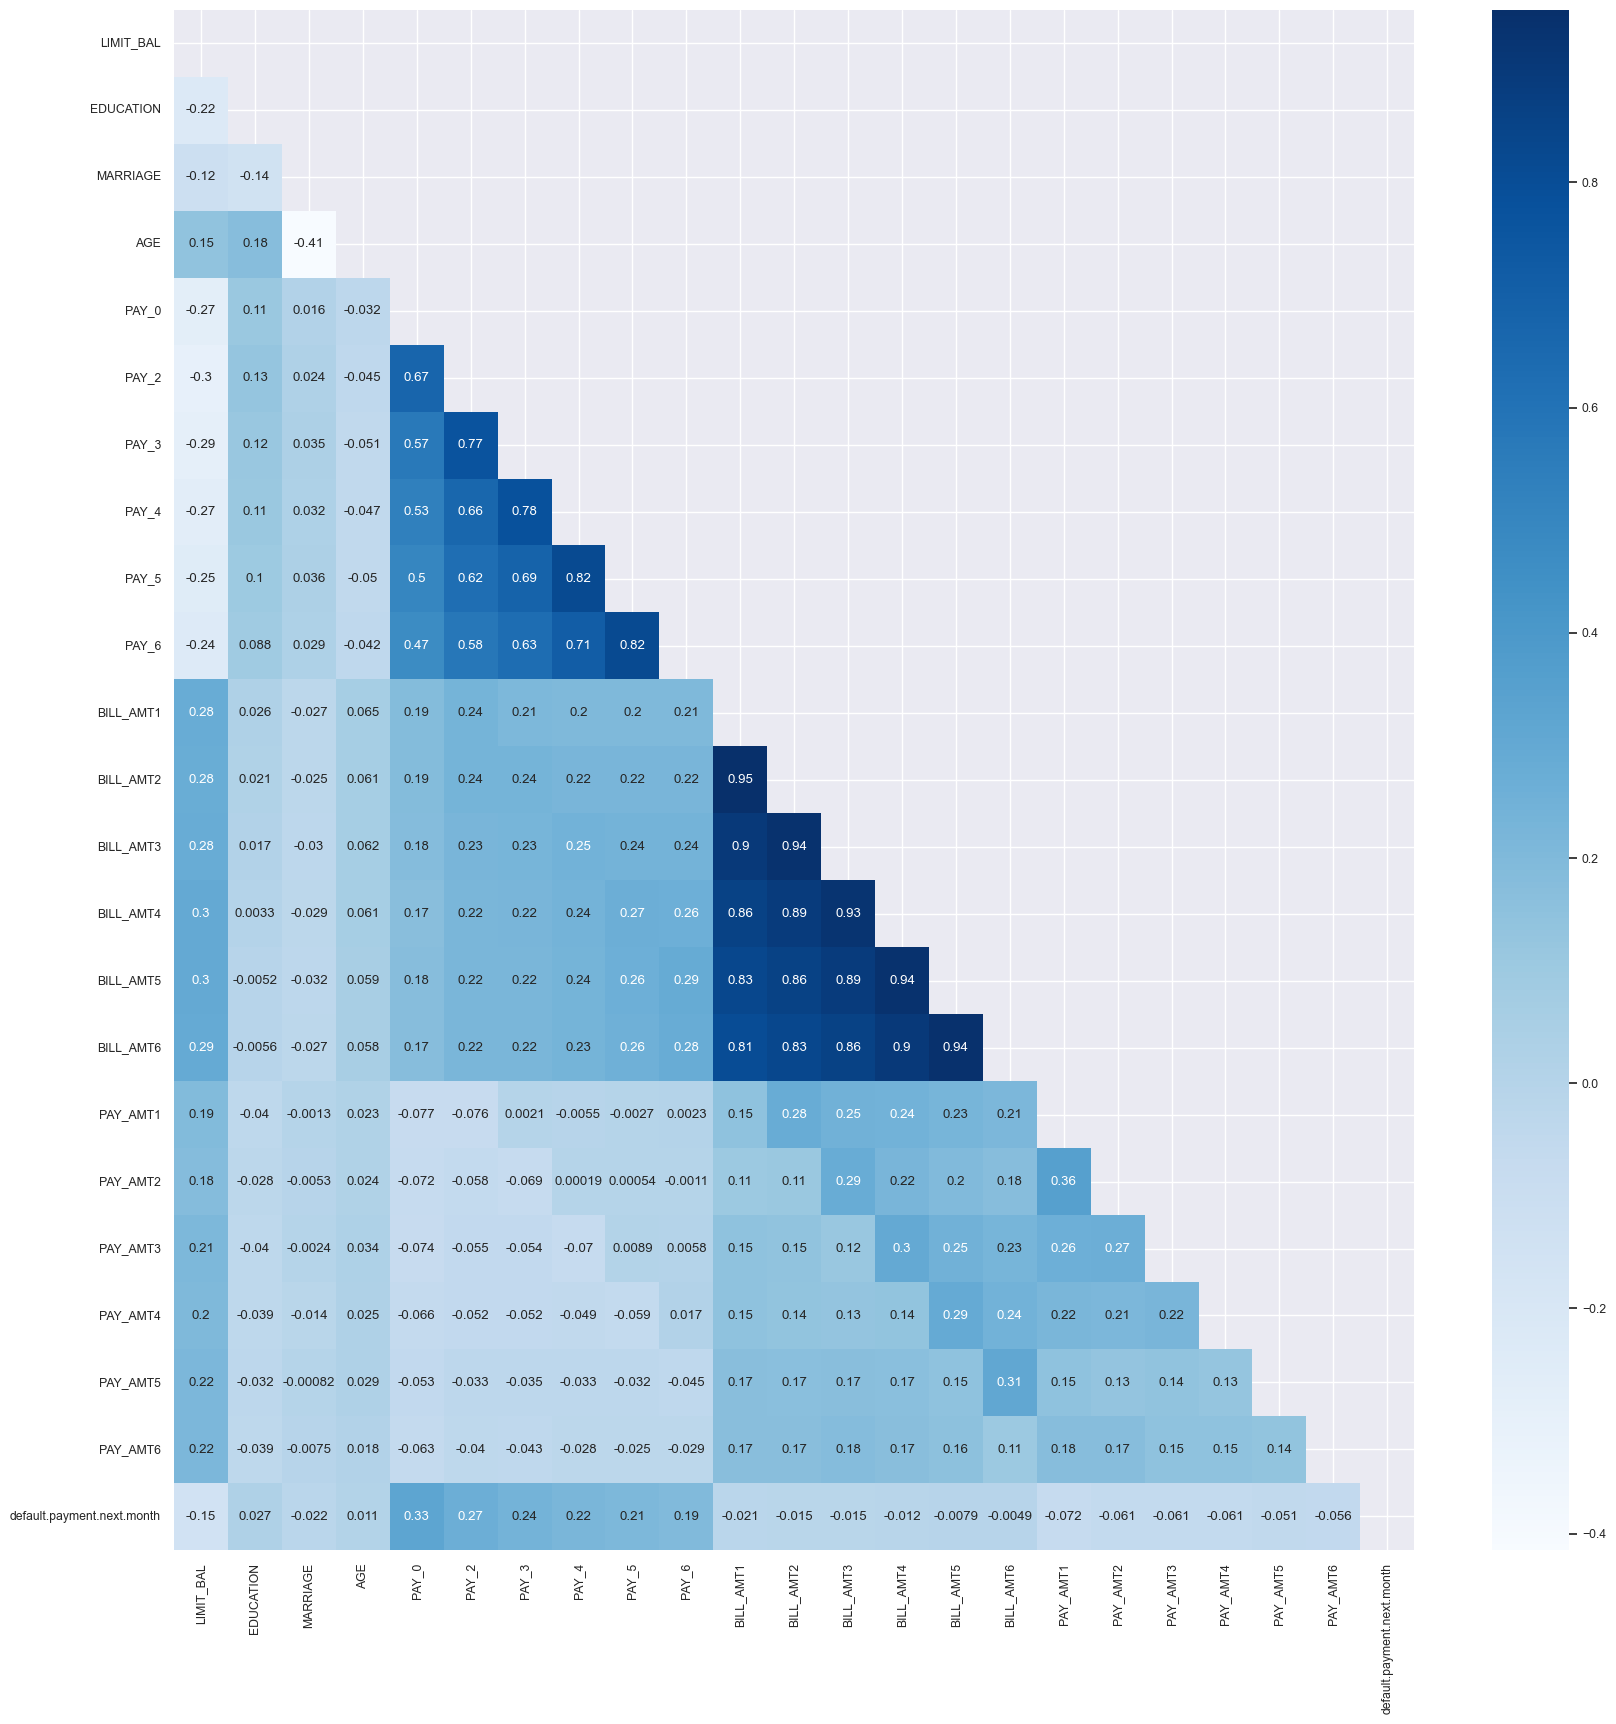

In [40]:
corr = train_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20, 20))
sns.set(font_scale=0.8)
sns.heatmap(cor, mask=mask, annot=True, cmap=plt.cm.Blues);

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering
<hr>
rubric={points:1}

<div class="alert alert-info">
    
**Your tasks:**

1. **Perform feature engineering**: Create new features that are relevant to the problem and use this updated feature set in the following exercises. You may need to iterate between **feature engineering** and **preprocessing** to refine your features and improve model performance.
   
</div>

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

Here we apply the data processing discussed above.

In [ ]:
train_df["EDUCATION"] = train_df["EDUCATION"].replace({6: 5})
train_df = train_df.drop(train_df[train_df['MARRIAGE']==0].index)
train_df = train_df.drop(train_df[train_df['EDUCATION']==0].index)

In [ ]:
for p in pay_status_cols:
    train_df.loc[train_df[p]<=0, p] = 0

We considered discretizing the BILL_AMT and PAY_AMT features; however, this approach could lead to overfitting, since there is no strong reason to assume that individuals in adjacent bins differ meaningfully in credit behavior. At the same time, keeping these features continuous may also be problematic for logistic regression, as a single weight could unrealistically assign higher risk to clients with larger bill or payment amounts. Thus, we will leave these features continuous and apply scaling to limit the effect of magnitude differences.

In [ ]:
train_df['TOTAL_PAY_AMT'] = train_df[pay_amt_cols].sum(axis=1)
train_df['TOTAL_BILL_AMT'] = train_df[bill_amt_cols].sum(axis=1)
train_df['TOTAL_PAY_RATIO'] = np.where(df['TOTAL_BILL_AMT'] == 0,
    1, df['TOTAL_PAY_AMT'] / df['TOTAL_BILL_AMT'])

Use total to avoid lagging payments. We use ration for LR so that it does not just boost examples with large payments. The problem comes when total bill amount is 0 so we suggest ...

In [ ]:
train_df['AVG_DELAY'] = train_df[pay_status_cols].mean(axis=1)
train_df['MAX_DELAY'] = train_df[pay_status_cols].max(axis=1)

In [ ]:
for i in range(2, 7):
    train_df[f'BILL_GROWTH{i}'] = train_df[f'BILL_AMT{i}'] - train_df[f'BILL_AMT{i-1}']


Bill growth is a good representative of piling debt. For LR we should use some type of ratio that represents bill growth rate

In [ ]:
train_df.head()

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Identify feature types**: Determine the different types of features in your dataset (e.g., numerical, categorical, ordinal, text) and specify the transformations you would apply to each type.

2. **Define a column transformer (if needed)**: Implement a `ColumnTransformer` to apply the appropriate preprocessing steps to each feature type.
 
</div>

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [ ]:
X_train = train_df.drop(columns=['default.payment.next.month'])
y_train = train_df['default.payment.next.month']

X_test = test_df.drop(columns=['default.payment.next.month'])
y_test = test_df['default.payment.next.month']

In [ ]:
train_df['EDUCATION'].value_counts()

In [ ]:
numeric_features = (
    bill_amt_cols
    + pay_amt_cols
    + [
        'LIMIT_BAL',
        'AGE',
        'TOTAL_PAY_AMT',
        'TOTAL_BILL_AMT',
        'TOTAL_PAY_RATIO',
        'AVG_DELAY',
        'MAX_DELAY',
        'BILL_GROWTH2',
        'BILL_GROWTH3',
        'BILL_GROWTH4',
        'BILL_GROWTH5',
        'BILL_GROWTH6',
    ]
)
categorical_features = ['MARRIAGE']
ordinal_features = [pay_status_cols + ['EDUCATION']]
drop_features = ['ID', 'SEX']

education_levels = [4, 3, 2, 1] # We can remove 6 and 5 but they may contain some info
pay_status_levels = [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
assert set(education_levels) == set(train_df["EDUCATION"].unique())

In [ ]:
numeric_transformer = StandardScaler()
ordinal_transformer = OrdinalEncoder(categories=[education_levels], dtype=int)
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)


In [ ]:
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (ordinal_transformer, ordinal_features),
    (categorical_transformer, categorical_features),
    ("drop", drop_features),
)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. **Establish a baseline**: Use one of `scikit-learn`’s baseline models (e.g., `DummyClassifier` or `DummyRegressor`, depending on your task) and report the results. This will serve as a reference point for evaluating the performance of your more advanced models.

</div>

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [ ]:
results_dict = {}  # dictionary to store all the results
scoring = [
    "accuracy",
    "f1",
    "recall",
    "precision",
    ]
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []
    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [ ]:
dummy = DummyClassifier(random_state = 123)
pipe = make_pipeline(preprocessor, dummy)

In [ ]:
results_dict["dummy"] = mean_std_cross_val_scores(pipe, X_train, y_train, return_train_score=True, scoring = scoring)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models 
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Train a linear model**: Use a linear model as your first real attempt at solving the problem.

2. **Tune hyperparameters**: Perform hyperparameter tuning to explore different values of the model's complexity parameter. 

3. **Evaluate with cross-validation**: Report the cross-validation scores along with their standard deviation.

4. **Summarize findings**: Summarize your results, highlighting key observations from your experiments.

</div>

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
pipe_lr = make_pipeline(
    preprocessor,
    LogisticRegression(max_iter=1000, random_state=123),
)

In [ ]:
from scipy.stats import randint, loguniform
param_grid = {
    "countvectorizer__max_features": randint(8000, 20000),
    "logisticregression__C": loguniform(1e-2, 10),
}
random_search = RandomizedSearchCV(pipe_lr, param_distributions=param_grid, n_jobs=-1, n_iter=100, return_train_score=True)
random_search.fit(X_train, y_train)

In [ ]:
best_max_features = random_search.best_params_['countvectorizer__max_features']
best_C = random_search.best_params_['logisticregression__C']

In [ ]:
results_dict["lr"] = mean_std_cross_val_scores(
    pipe, X_train, y_train, cv=5, return_train_score=True
)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models
<hr>
rubric={points:12}

<div class="alert alert-info">
    
**Your tasks:**

1. **Experiment with additional models**: Train at least **three models** other than a linear model. Ensure that **at least one** of these models is a **tree-based ensemble model** (e.g., Random Forest, Gradient Boosting, or XGBoost).

2. **Compare and interpret results**: Summarize your findings in terms of **overfitting/underfitting** behavior and **fit/score times** for each model. Reflect on your results. Were you able to **outperform the linear model**?

</div>

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection 
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. **Perform feature selection**: Attempt to select relevant features using methods such as `RFECV` or forward selection.

2. **Evaluate the impact** Compare the model performance before and after feature selection. Do the results improve with feature selection?

3. **Summarize findings** Summarize your observations and decide whether to **keep feature selection** in your pipeline.  If it improves results, retain it for the next exercises; otherwise, you may choose to omit it.
</div>

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [ ]:
from sklearn.feature_selection import RFECV

rfe_cv = RFECV(LogisticRegression(max_iter=2000), cv=10)
rfe_cv.fit(X_train_scaled, y_train)
print(rfe_cv.support_)
print(cancer.feature_names[rfe_cv.support_])

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Optimize hyperparameters**: Attempt to optimize hyperparameters for the models you have tried so far. In at least **one case**, tune **multiple hyperparameters** for a single model.

2. **Use suitable optimization methods**: You may use any of the following approaches for hyperparameter optimization:
   - [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)  
   - [`RandomizedSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)  
   - [Bayesian optimization with scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)

3. **Summarize your results**: Report and compare the optimized results across models. Discuss whether hyperparameter optimization led to performance improvements.

</div>

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Interpret model feature importance**: Use one of the interpretation methods discussed in class (e.g., `shap`), or another suitable method of your choice, to examine the most important features of one of your **non-linear models**.

2. **Summarize insights**: Summarize your observations about which features contribute most to the model's predictions and how they influence the outcomes.

   
</div>

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
lr_coefs = pd.DataFrame(
    data=lr.named_steps["ridge"].coef_, index=new_columns, columns=["Coefficient"]
)
lr_coefs.head(20)

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set
<hr>

rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Evaluate on the test set**: Apply your best-performing model to the test data and report the test scores.

2. **Compare and reflect**: Compare the **test scores** with the **validation scores** from previous experiments. Discuss the consistency between them. How much do you **trust your results**? Reflect on whether you might have encountered **optimization bias**.

3. **Explain individual predictions**: Select one or two examples from your test predictions and use an interpretation method (e.g., **SHAP force plots**) to explain these individual predictions.
</div>

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results
<hr>
rubric={points:12}

Imagine you are preparing to present the summary of your results to your boss and co-workers.

<div class="alert alert-info">
    
**Your tasks:**

1. **Summarize key results**: Create a clear and concise table highlighting your most important results (e.g., models compared, validation/test scores, key observations).

2. **Write concluding remarks**: Summarize your main takeaways from the project, including what worked well and what did not.

3. **Propose future improvements**: Discuss ideas or approaches you did not try but that could potentially improve **performance** or **interpretability**.

4. **Report final results**: Report your **final test score** and the **metric** you used.

</div>


<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

</div>

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

I’ve learned that training supervised machine learning models is less about building complex algorithms and more about understanding and shaping the data that feeds them. The most important work often happens before model training — in data cleaning, feature engineering, and thoughtful preprocessing based on each feature’s characteristics. I also realized how much performance depends on experimenting with different models and tuning hyperparameters to find the best fit for the problem. Beyond accuracy, it’s equally crucial to interpret model behavior and understand which features drive its decisions, especially in high-stakes contexts where black-box models are not acceptable. Overall, my biggest takeaway is that successful machine learning relies as much on critical thinking and data understanding as it does on technical modeling skills.

<!-- END QUESTION -->

<br><br>

Before submitting your assignment, please ensure you have followed all the steps in the **Instructions** section at the top.  

### Submission checklist  

- [ ] Restart the kernel and run all cells (▶▶ button)
- [ ] Make sure to push the most up to date version of your homework assignment to your GitHub repository so that we can use it for grading if there are any problems with your submission on Gradescope. 
- [ ] The `.ipynb` file runs without errors and shows all outputs.  
- [ ] Only the `.ipynb` file and required output files are uploaded (no extra files).  
- [ ] If the `.ipynb` file is too large to render on Gradescope, upload a Web PDF and/or HTML version as well.


This was a tricky one but you did it 👏👏!  

![](img/eva-well-done.png)